In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

from create_feature_tools import restore_image_from_list

In [2]:
# Read the parquet file, this takes a while. Leave it here
dft = pl.read_parquet("data/train.parquet", use_pyarrow=True, memory_map=True)

C:\Users\teddy\AppData\Local\Temp\ipykernel_3564\2151727928.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(20, 20))


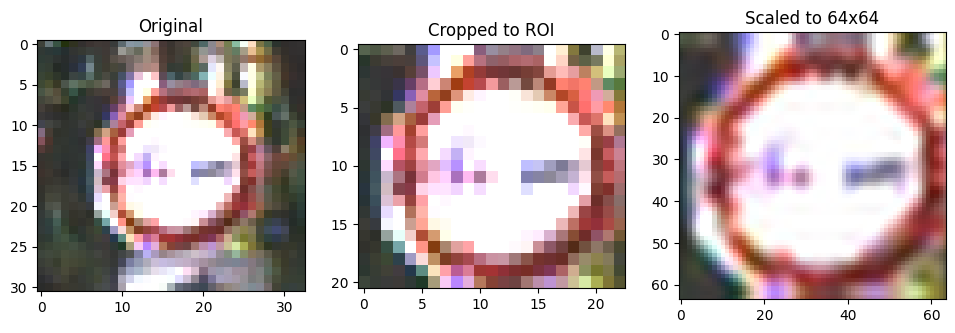

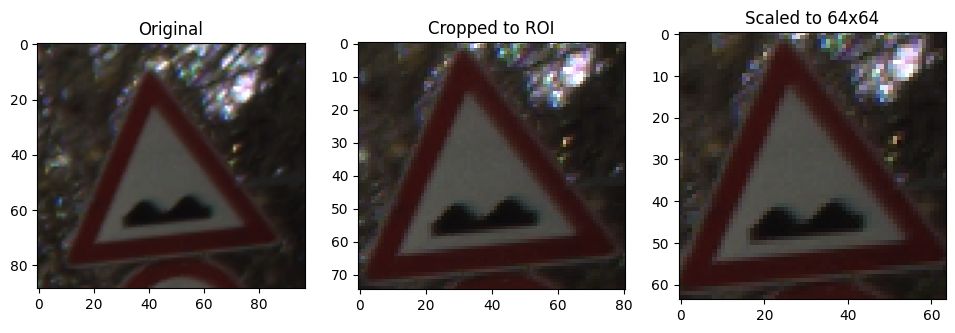

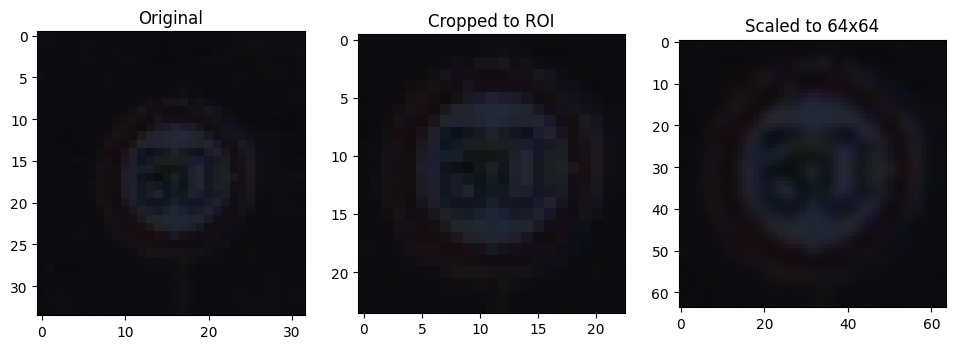

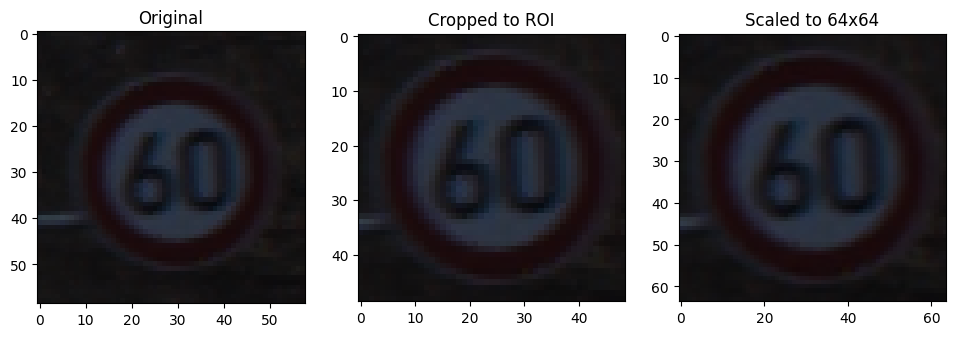

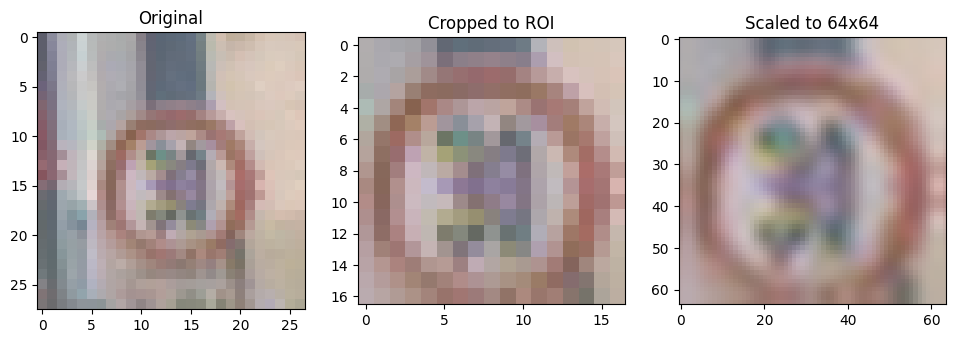

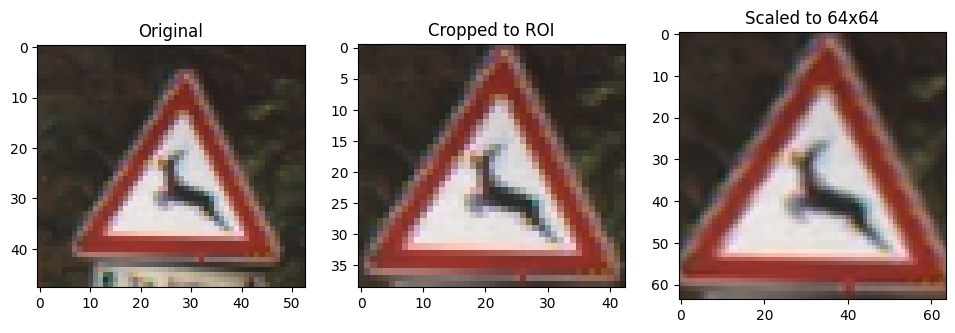

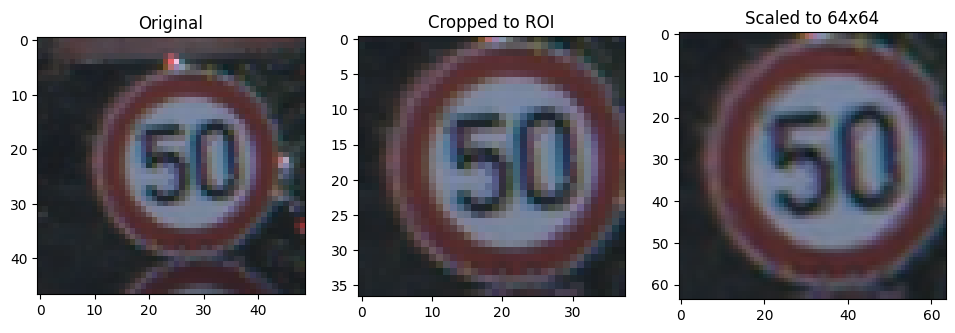

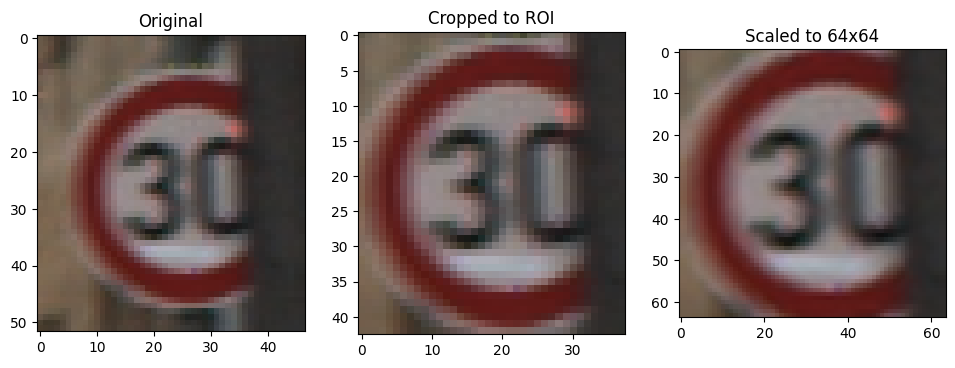

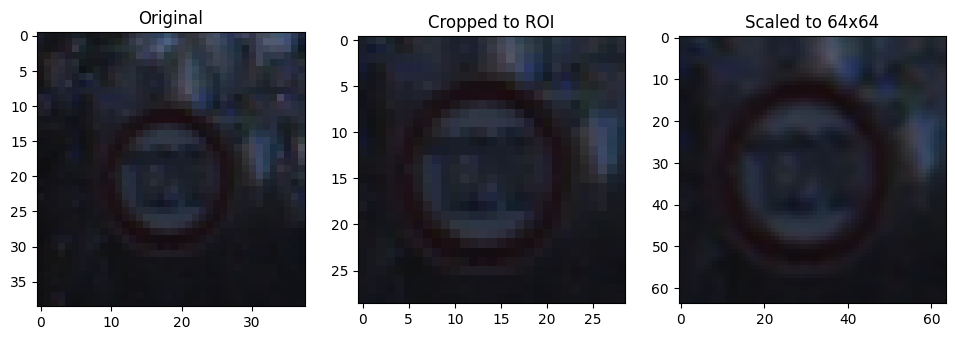

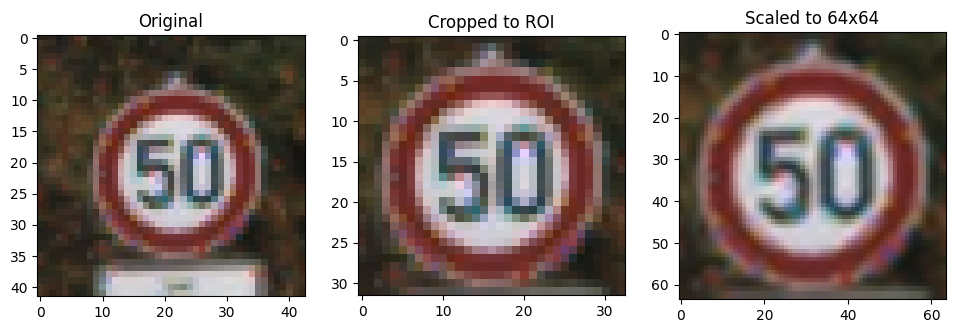

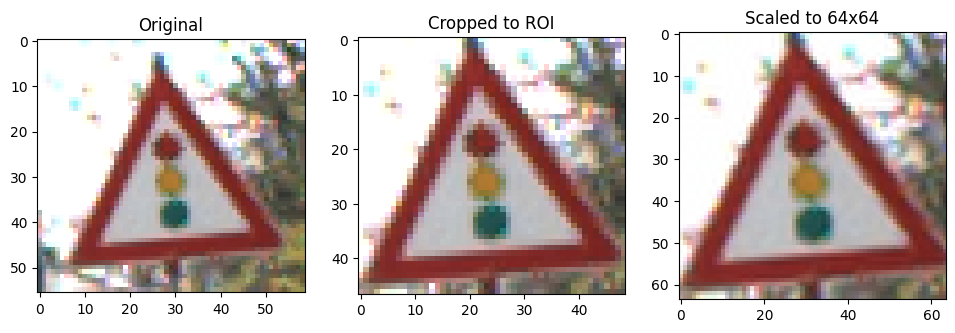

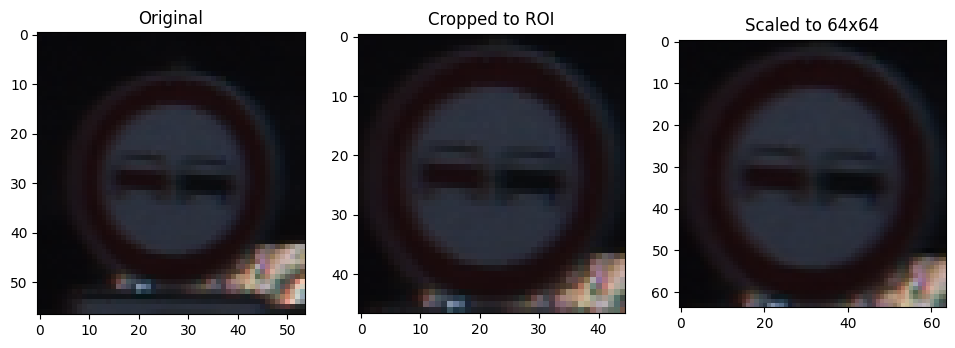

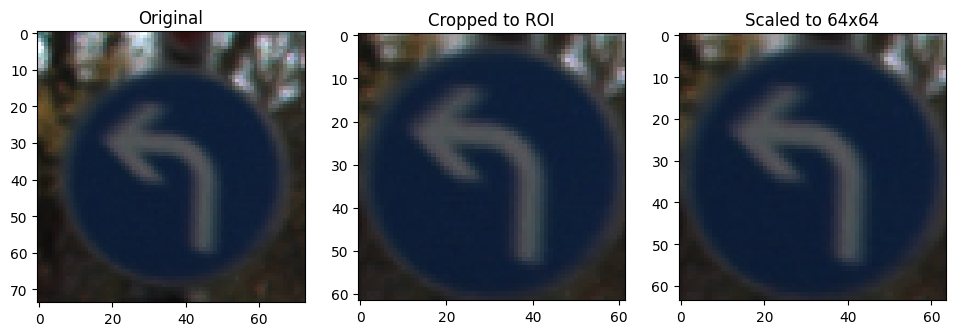

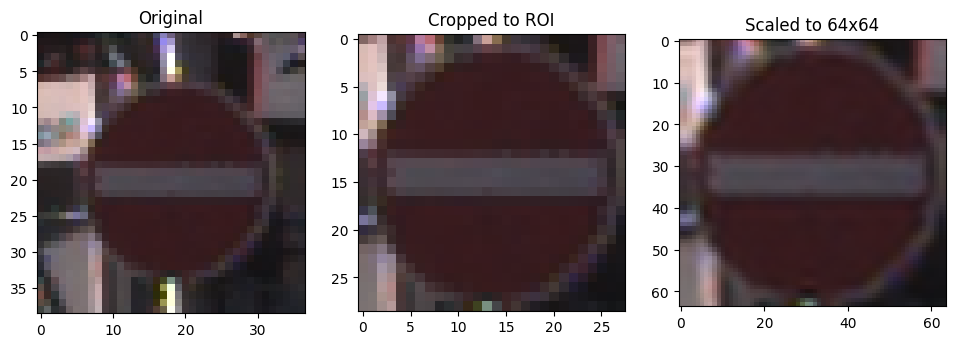

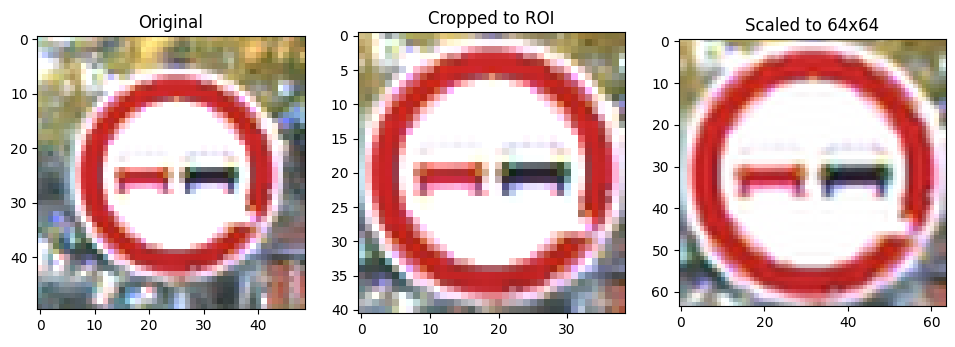

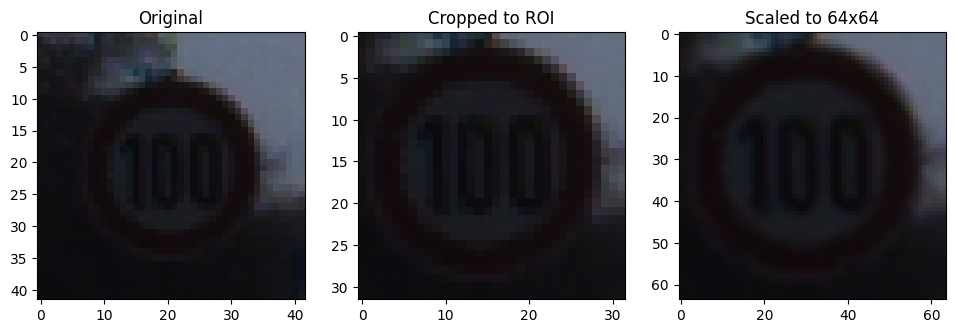

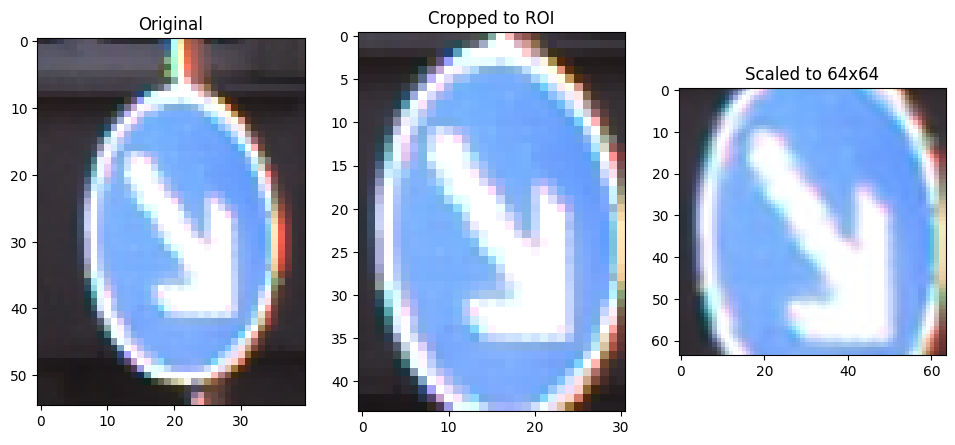

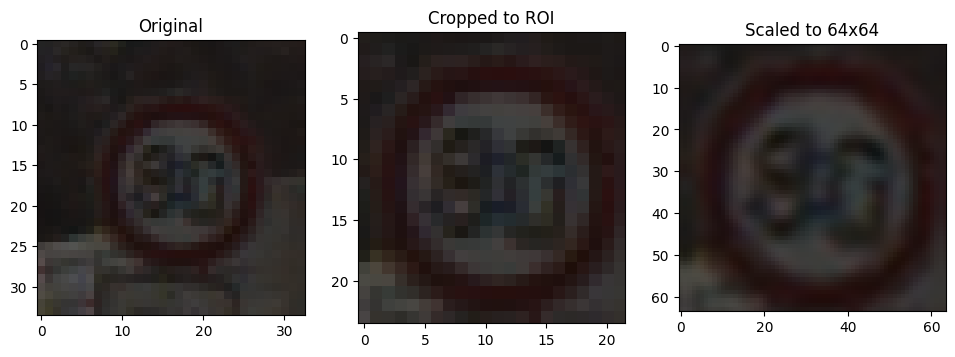

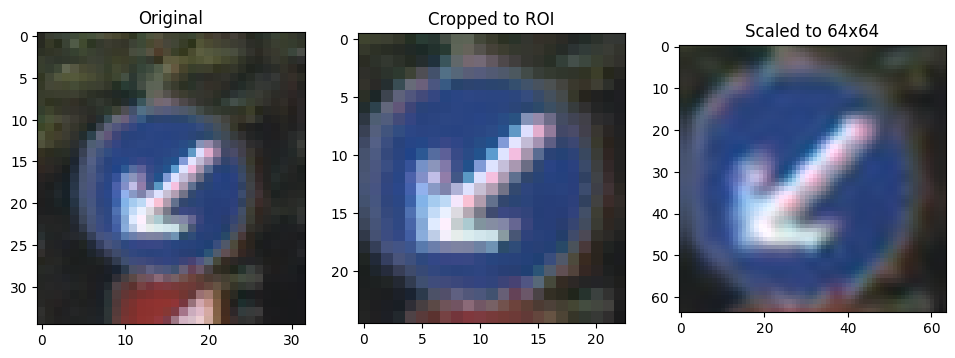

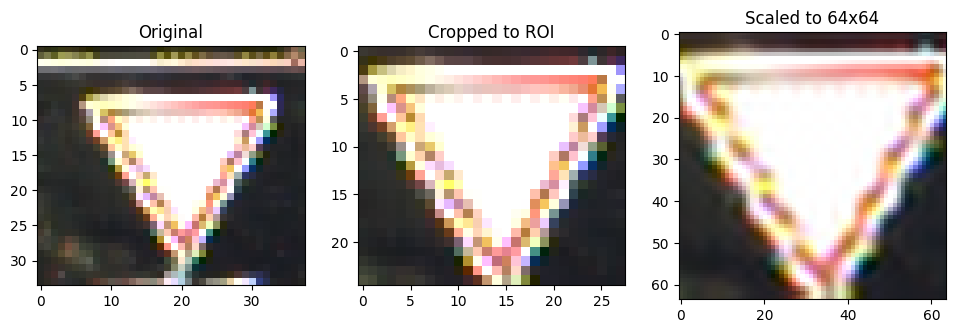

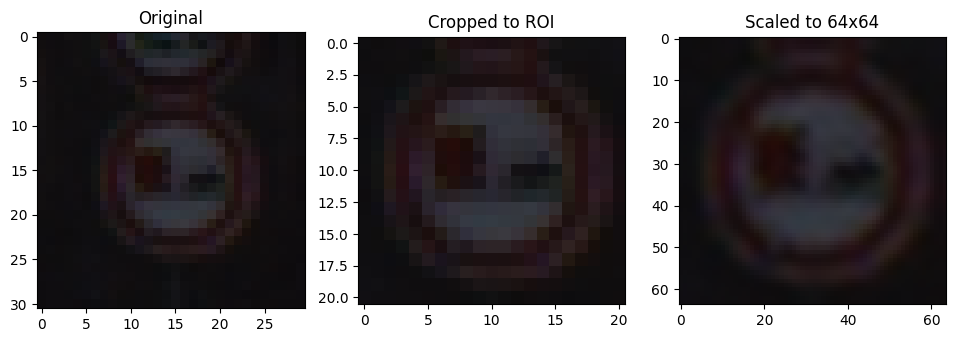

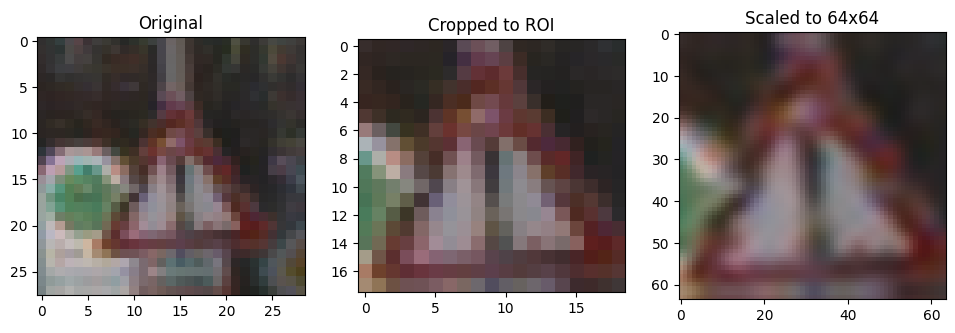

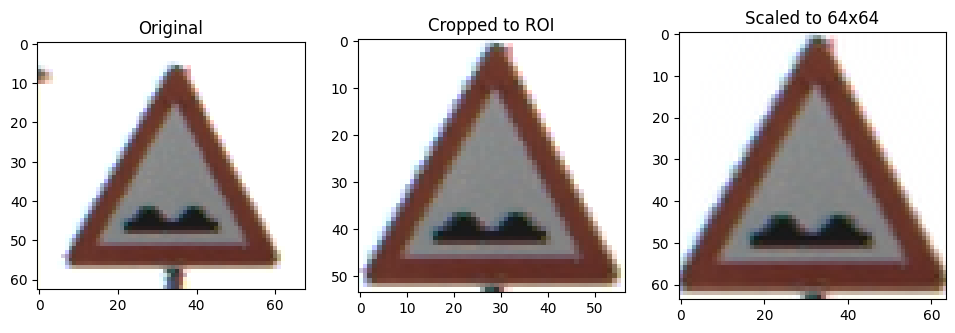

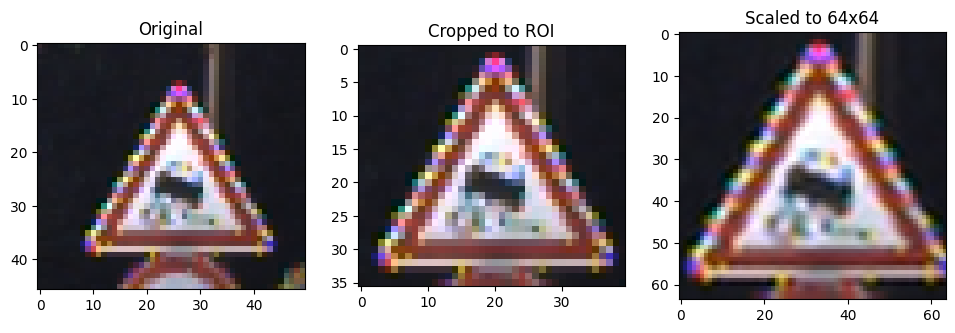

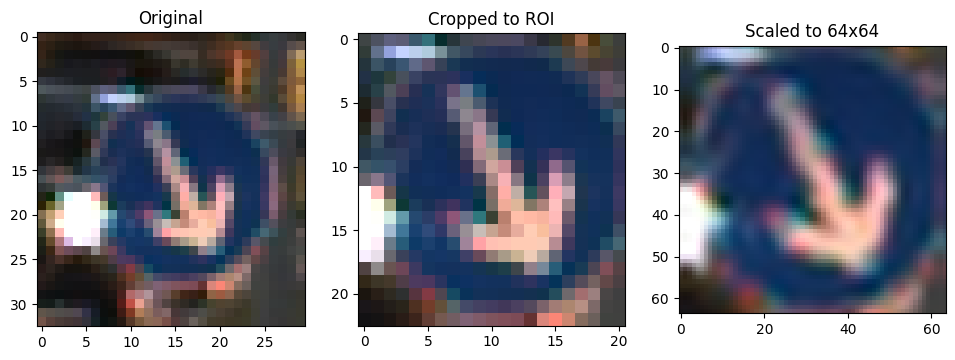

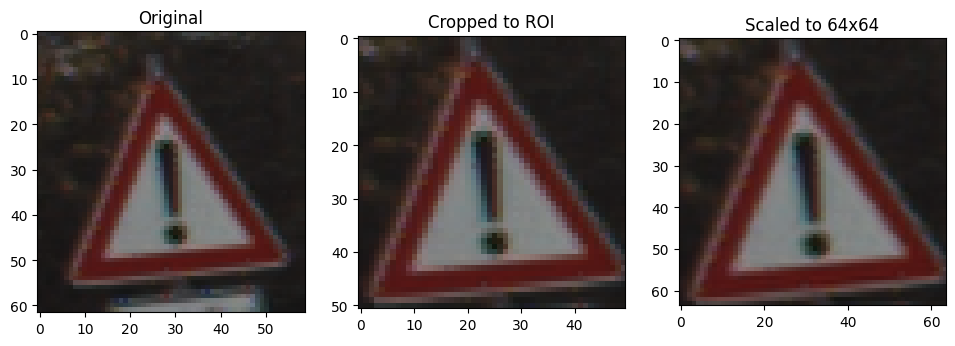

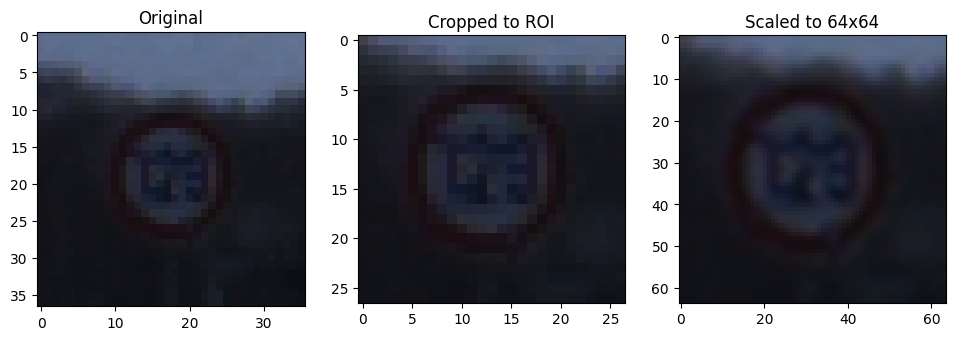

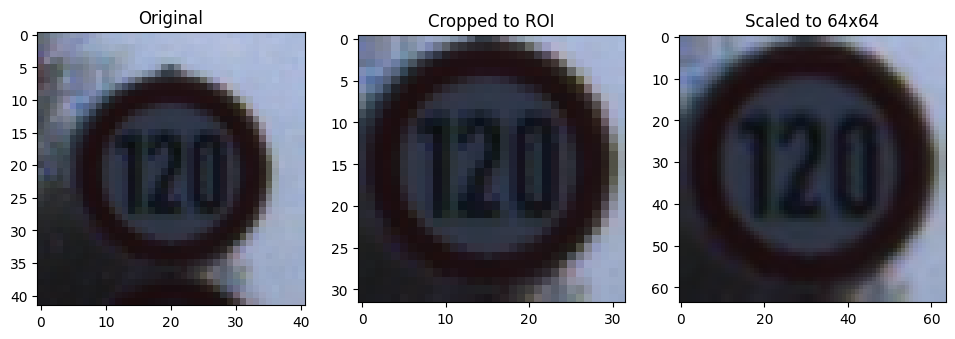

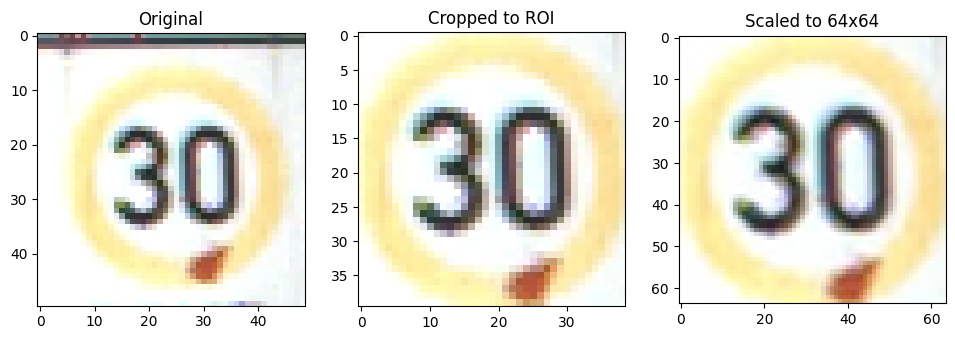

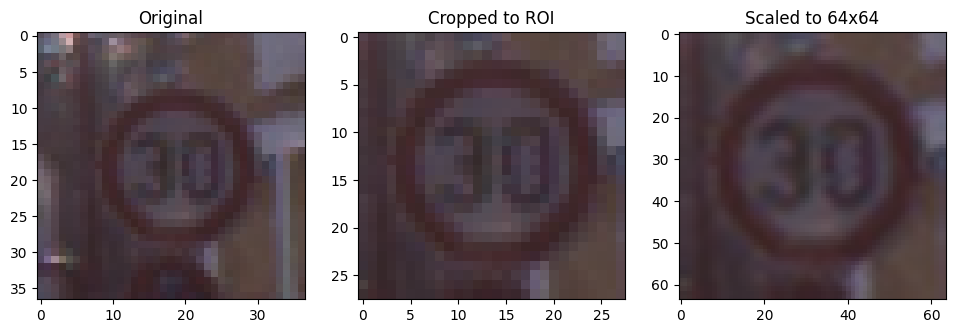

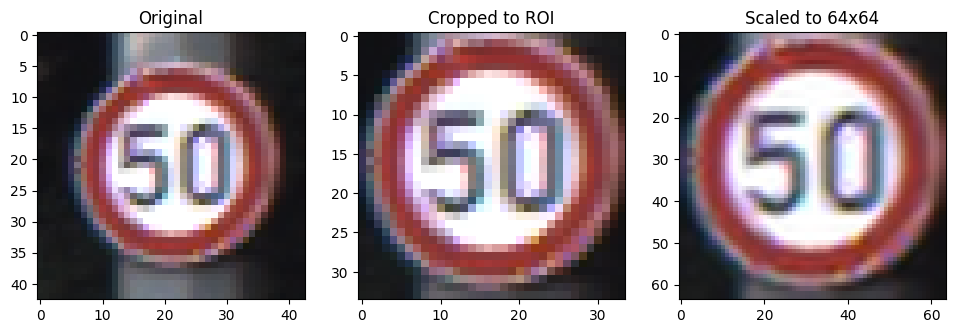

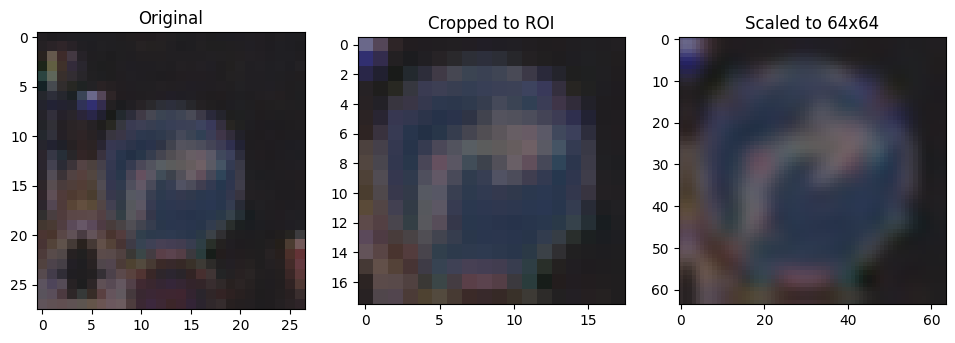

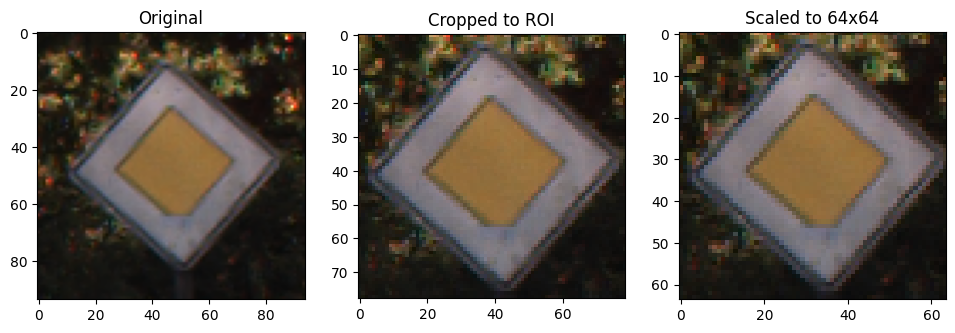

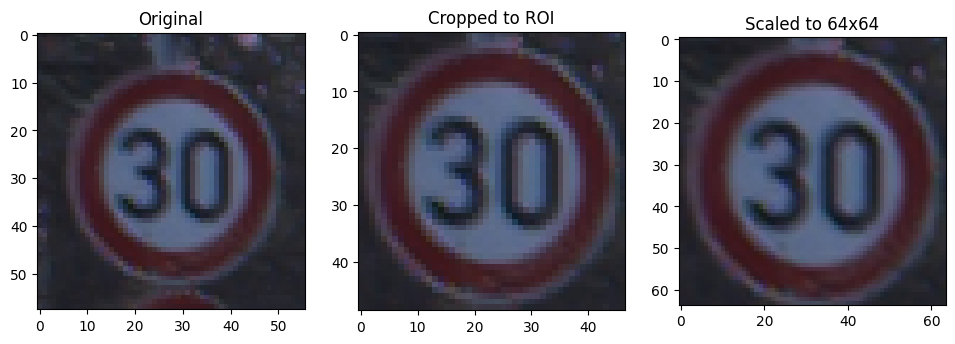

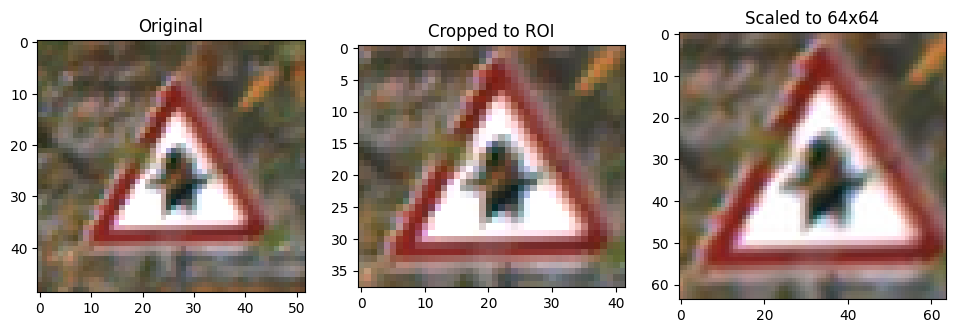

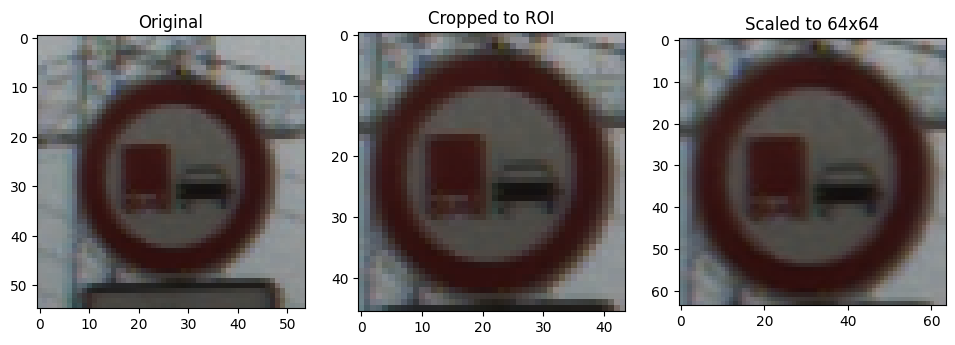

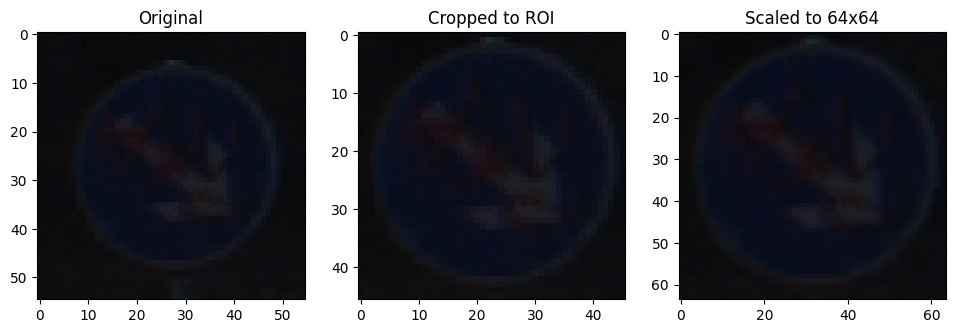

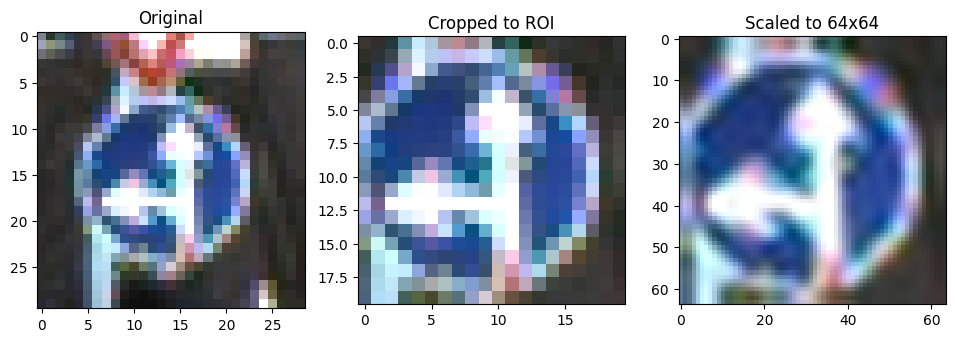

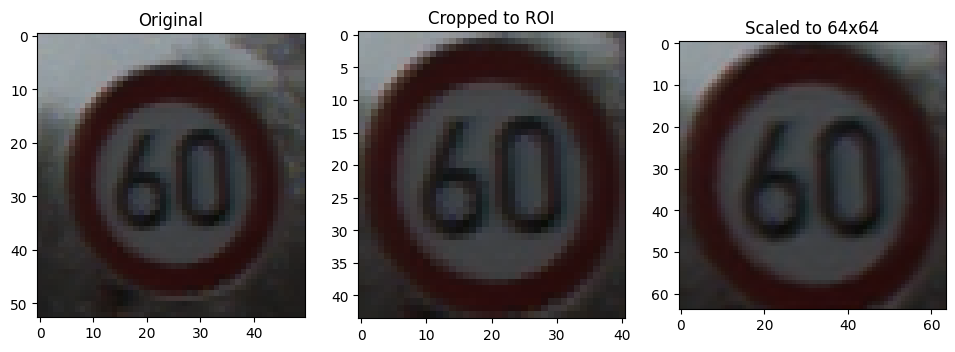

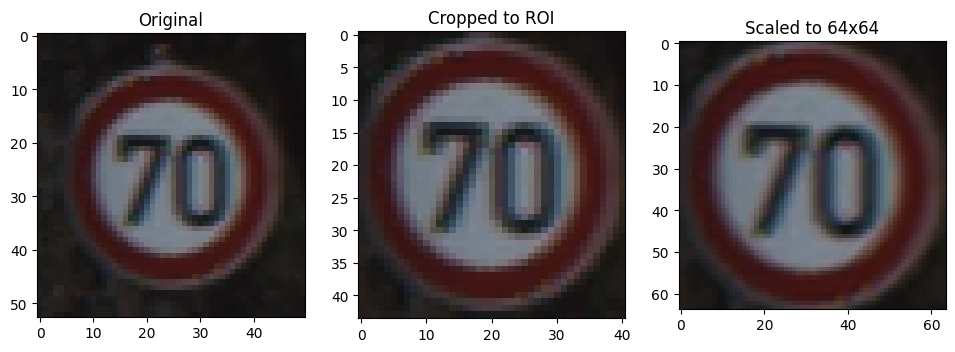

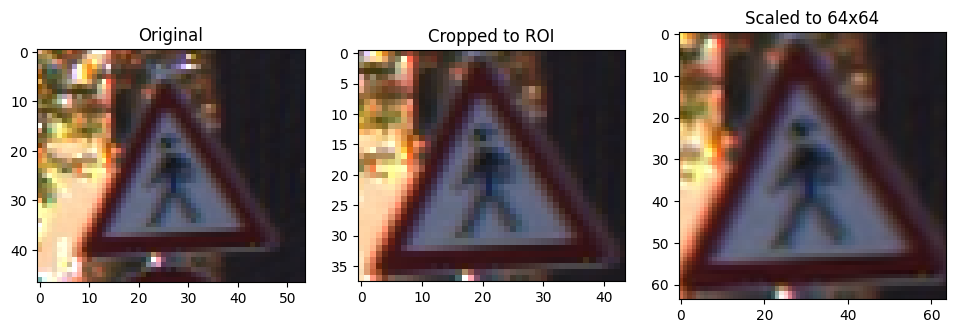

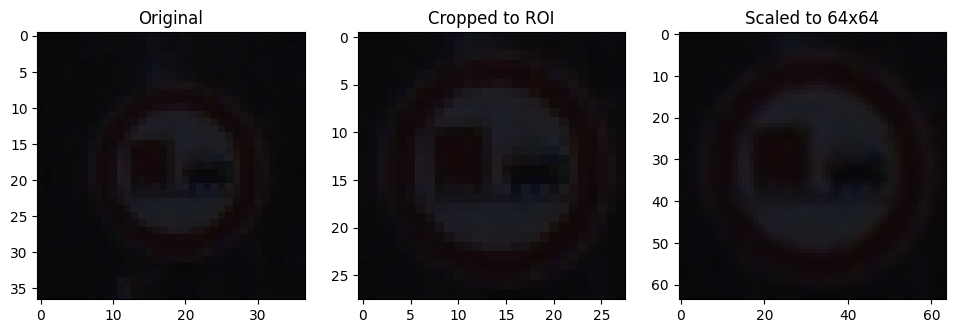

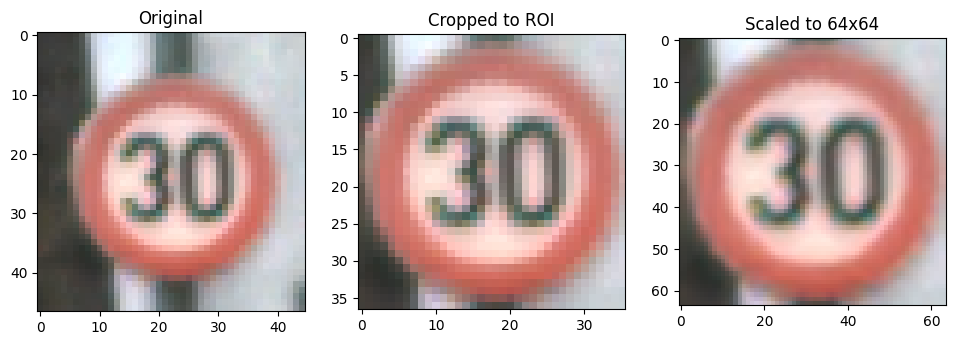

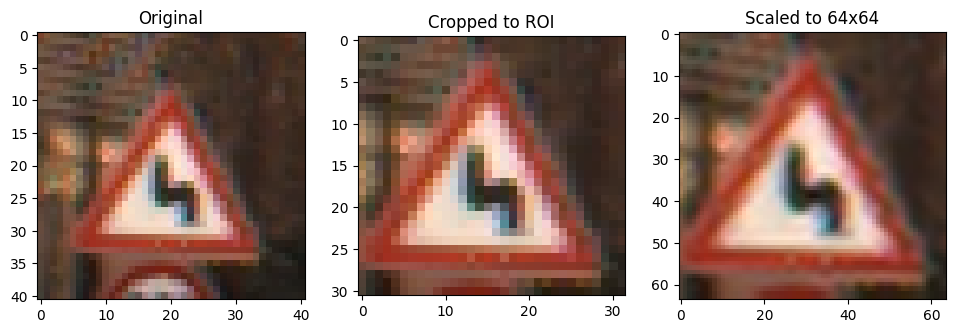

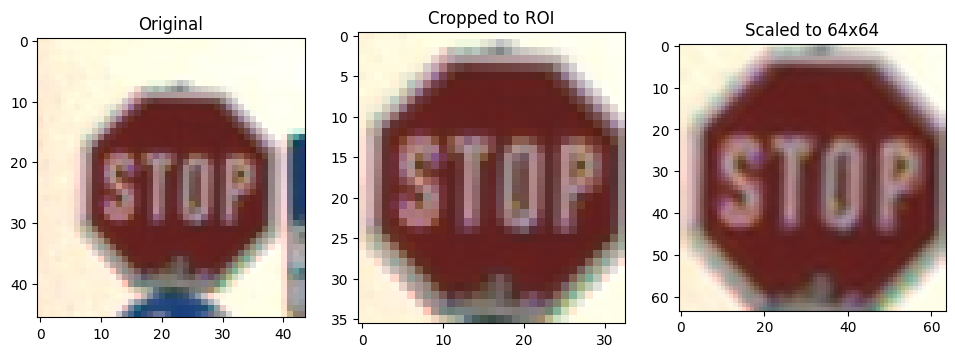

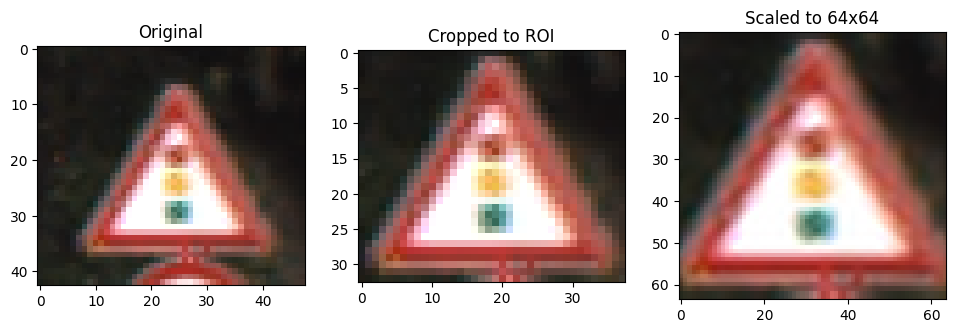

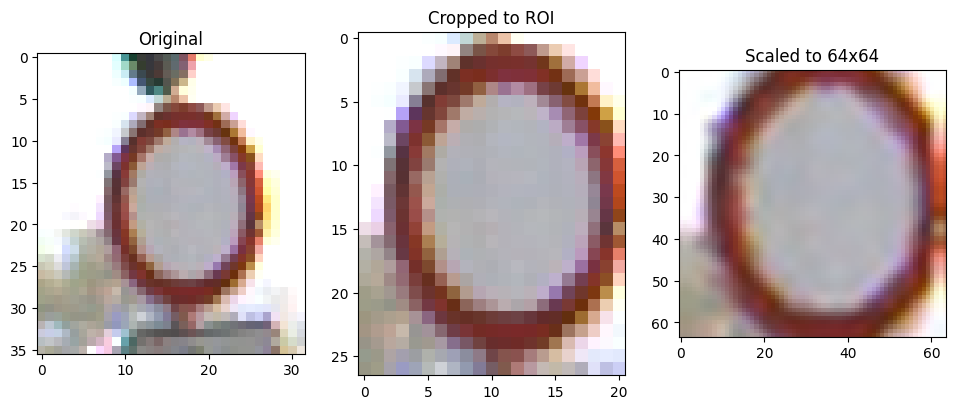

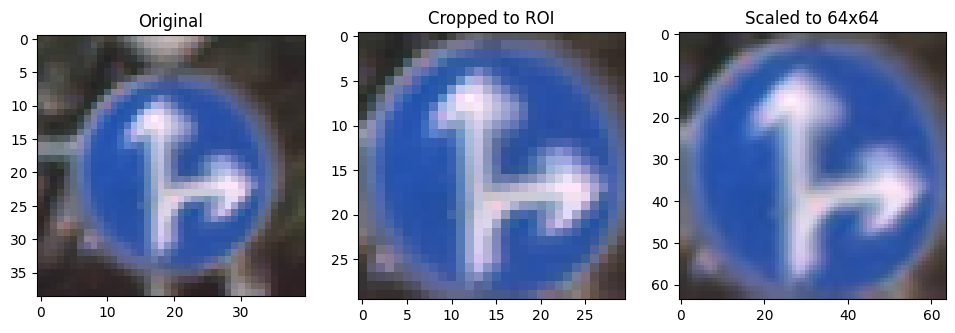

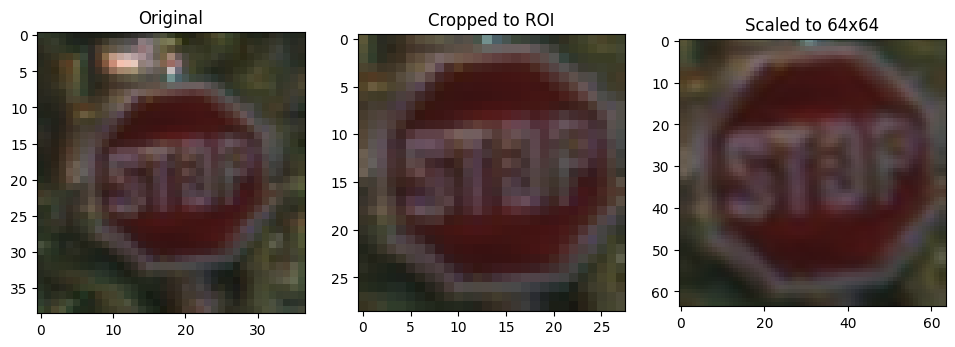

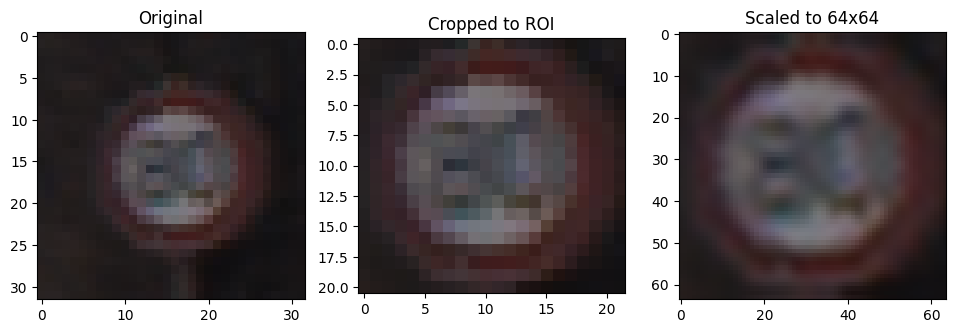

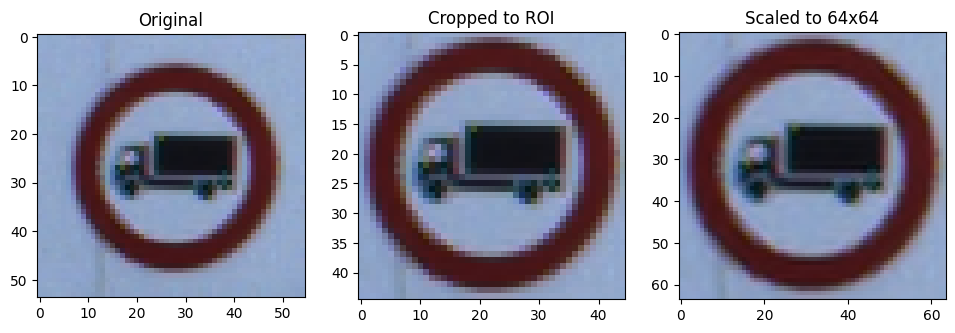

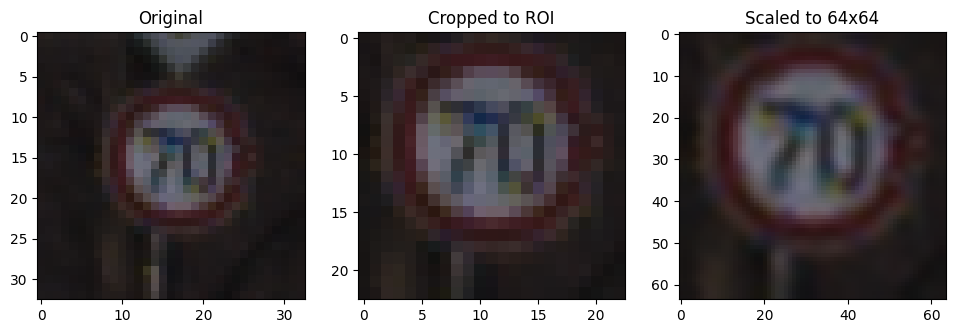

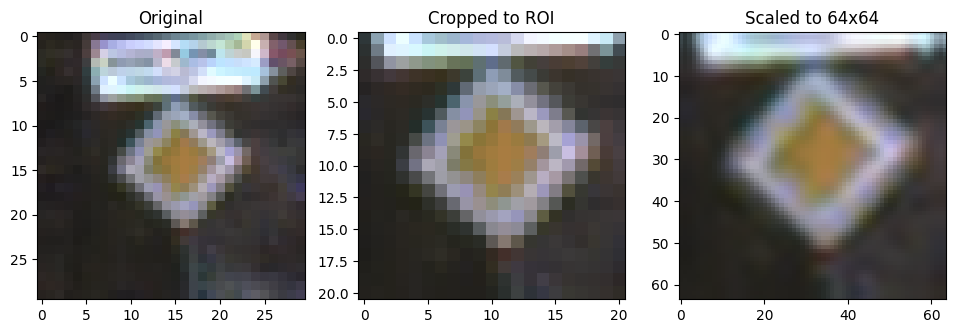

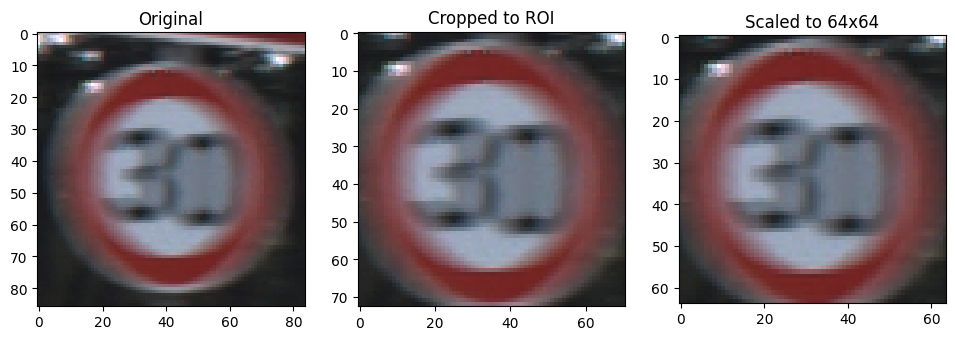

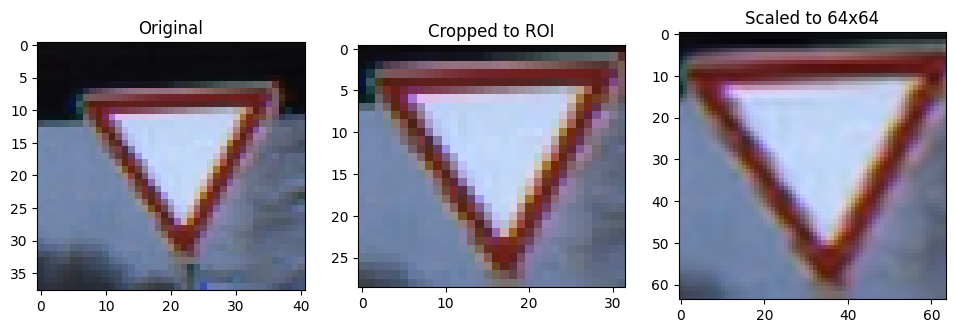

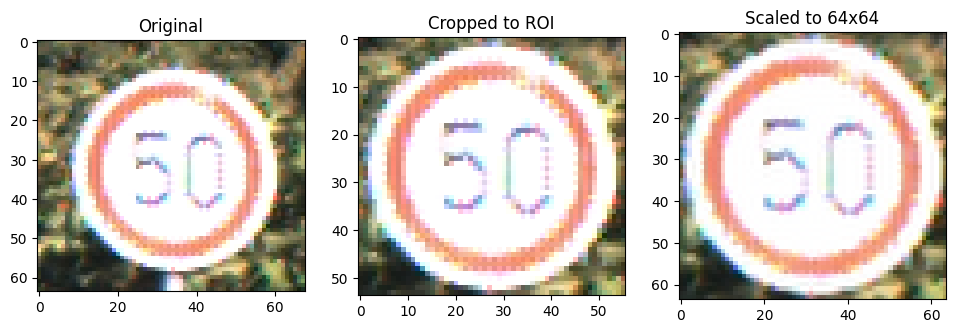

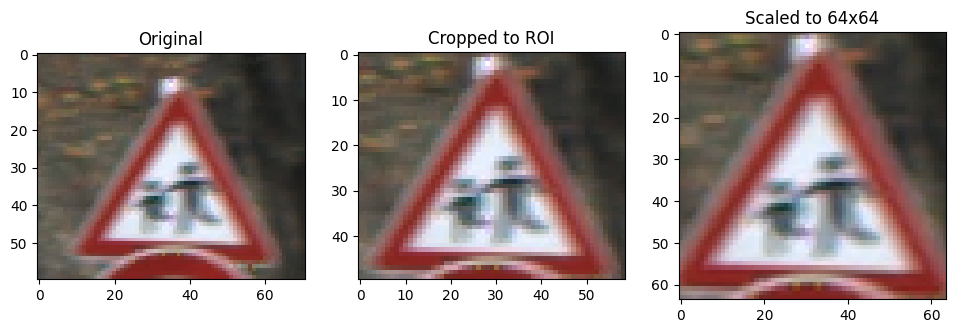

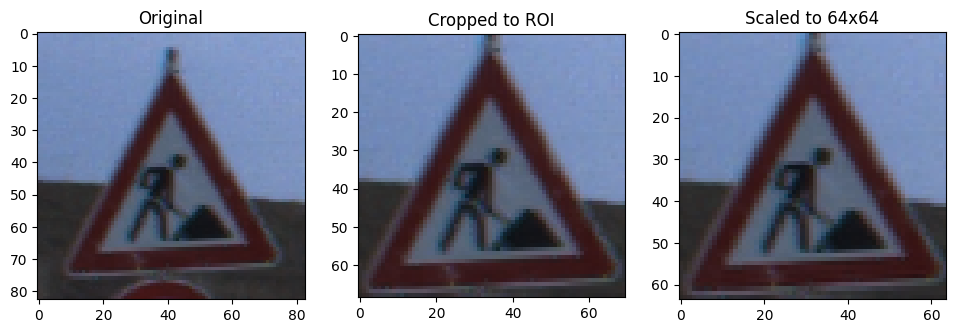

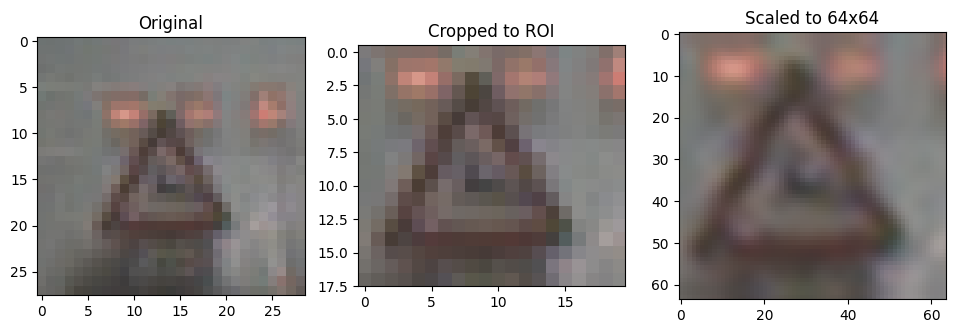

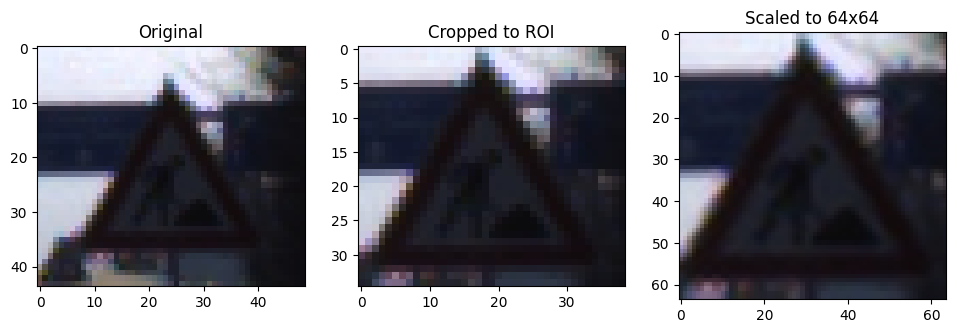

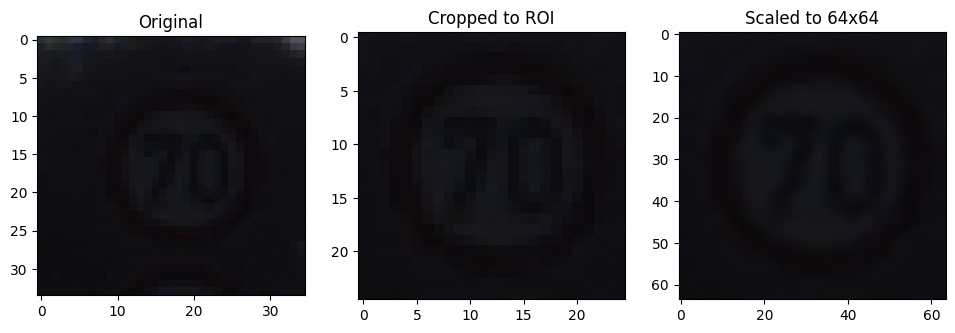

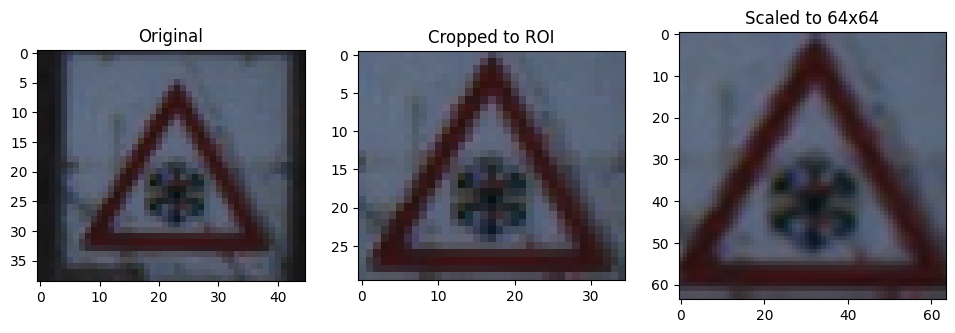

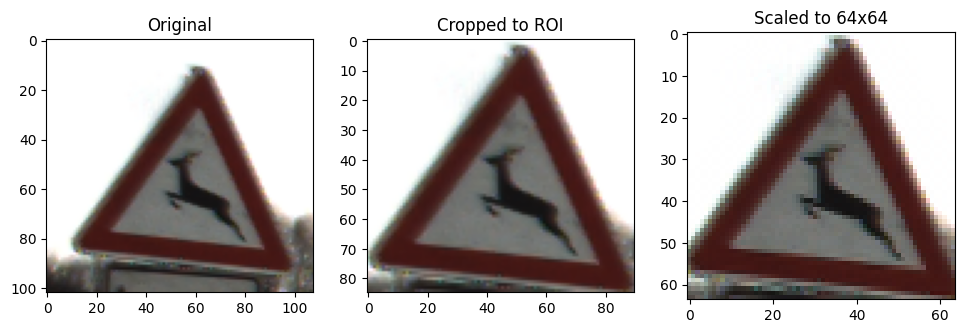

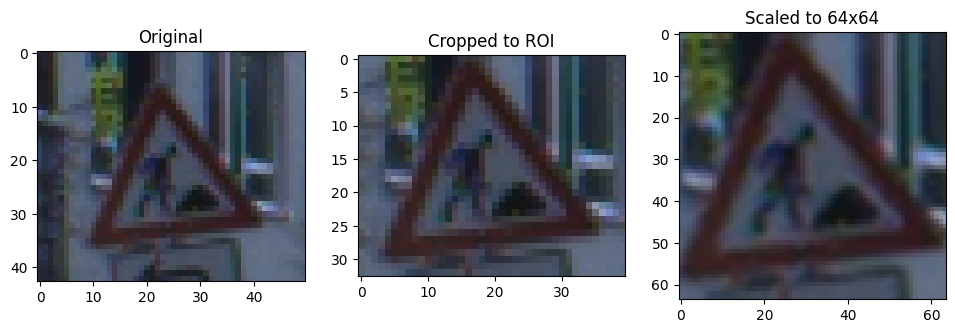

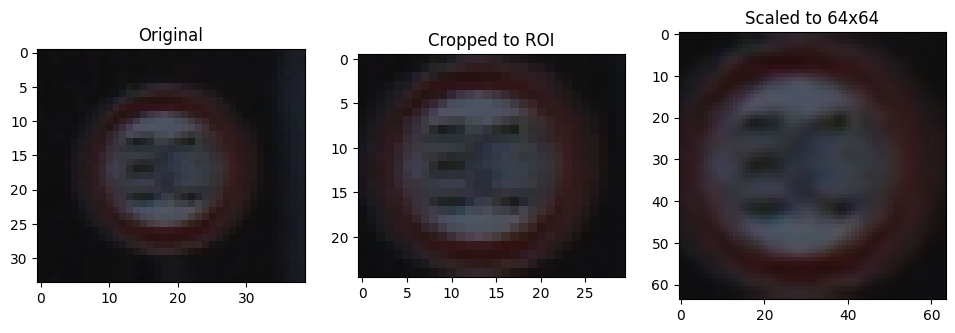

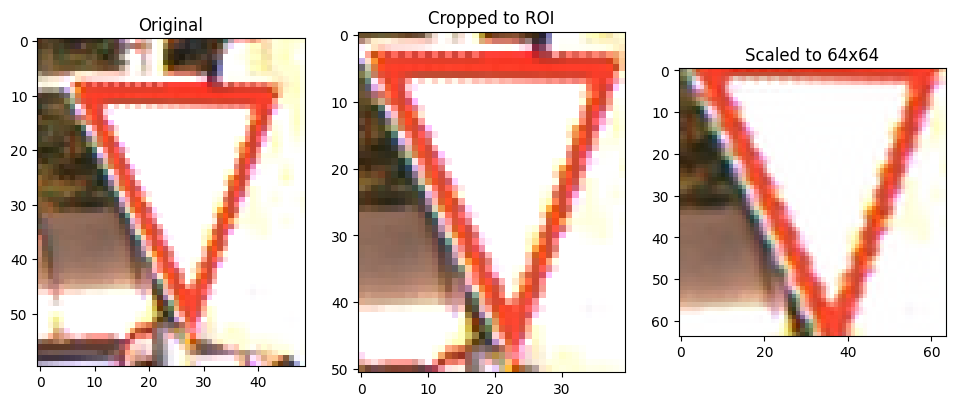

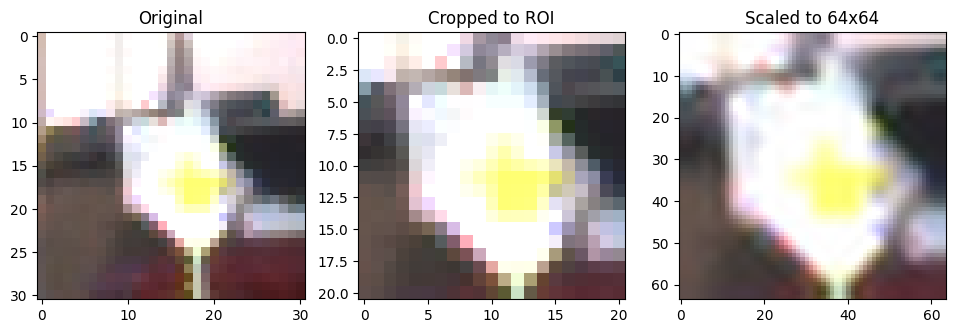

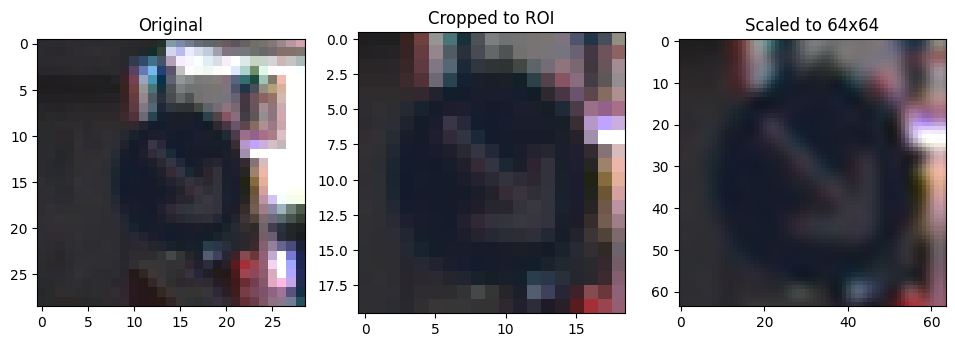

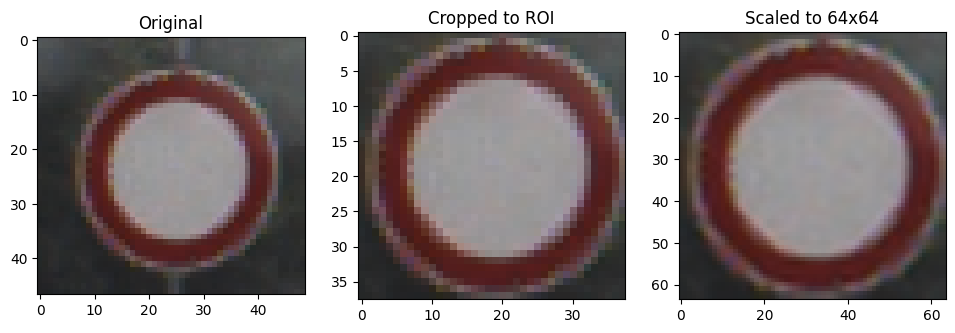

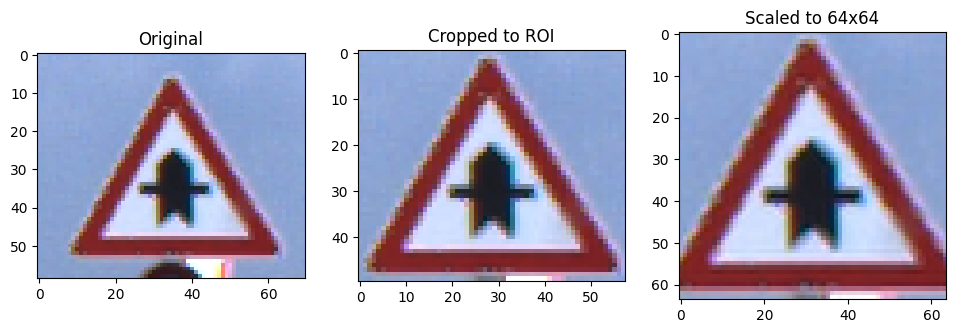

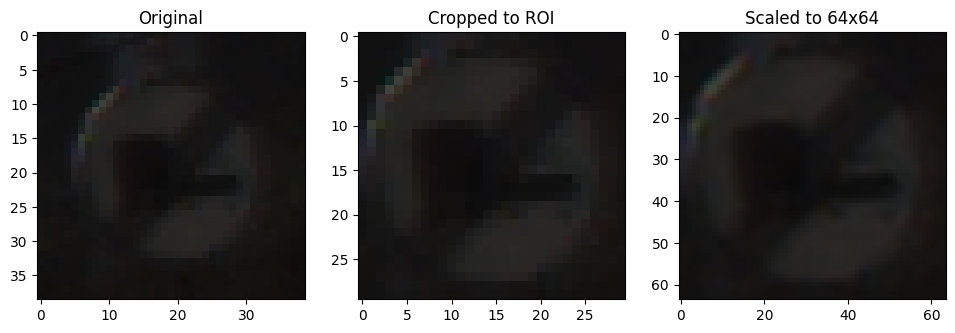

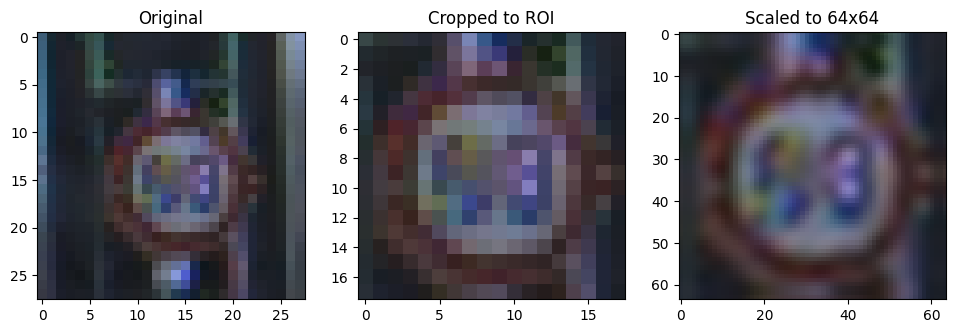

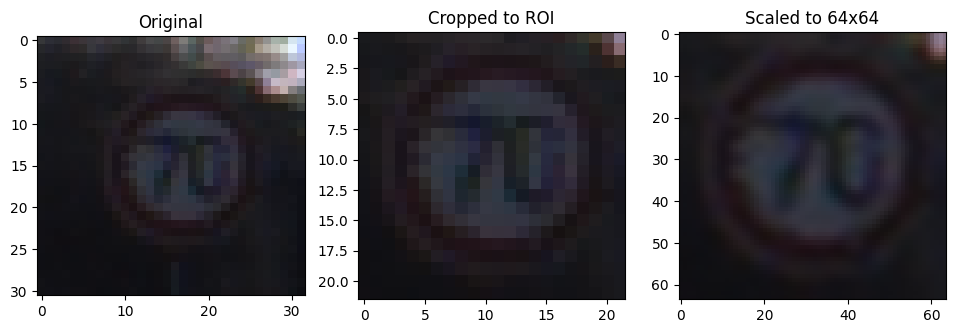

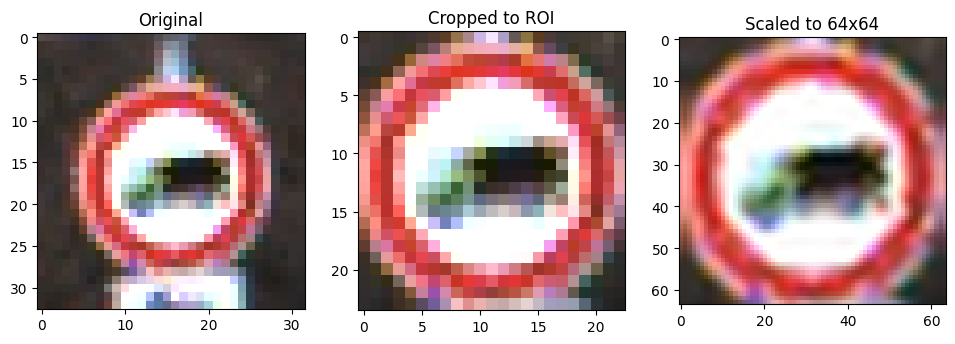

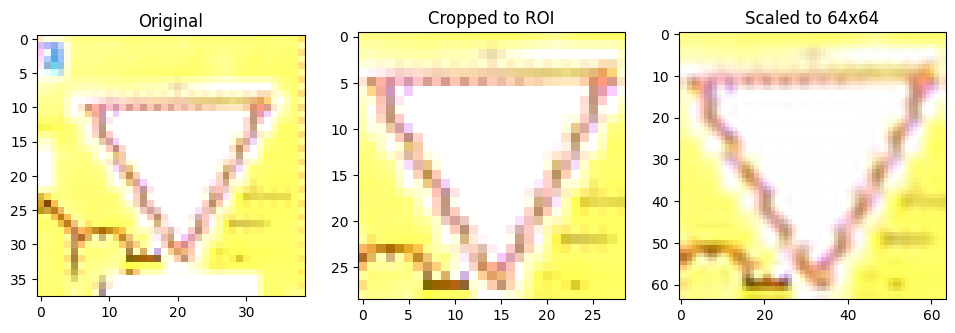

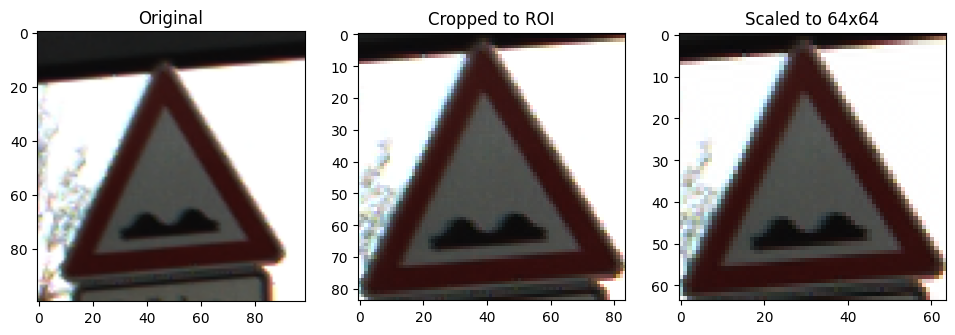

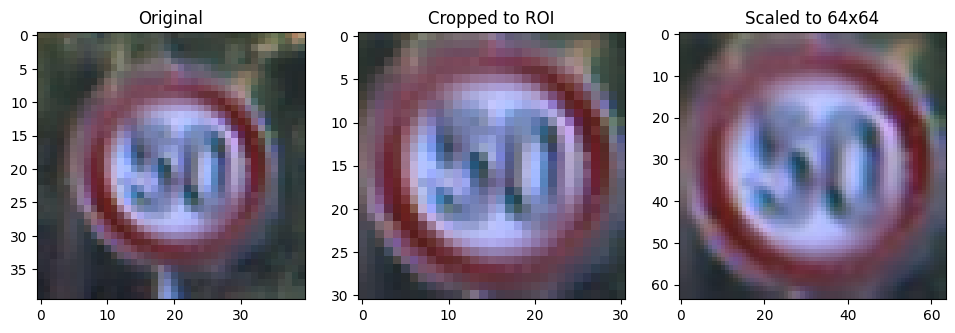

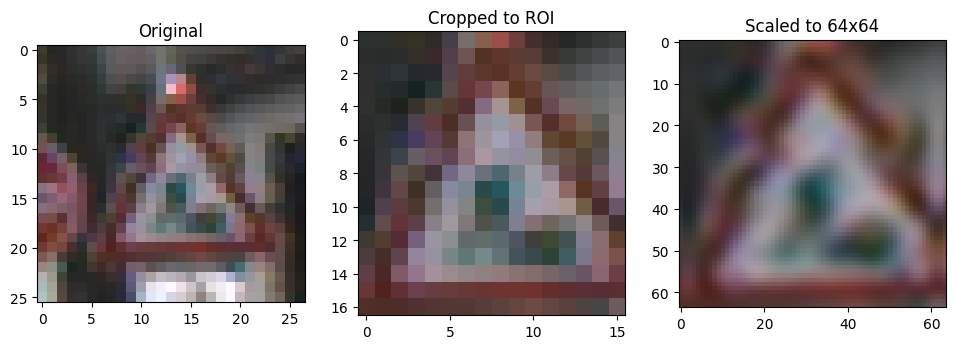

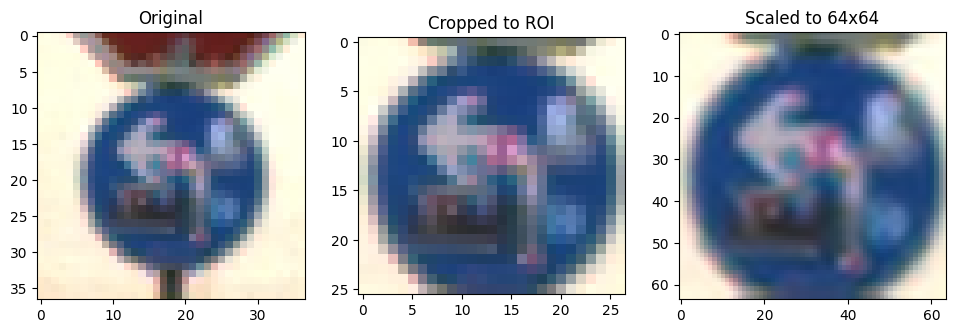

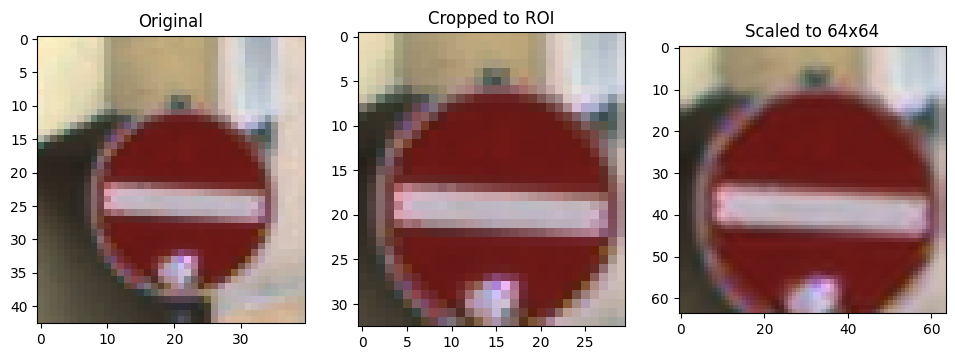

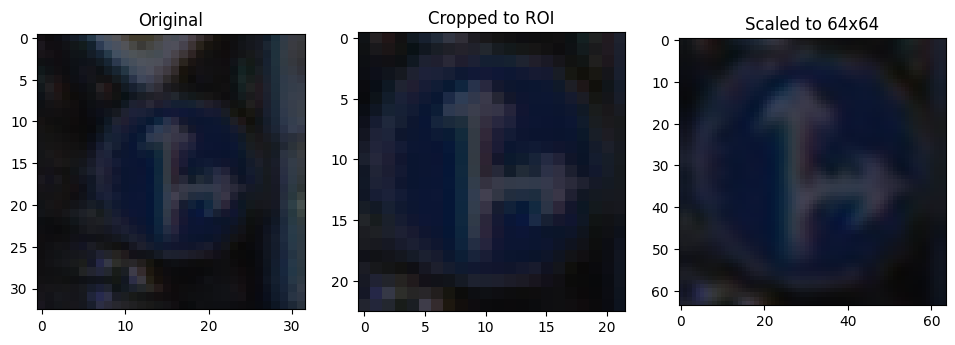

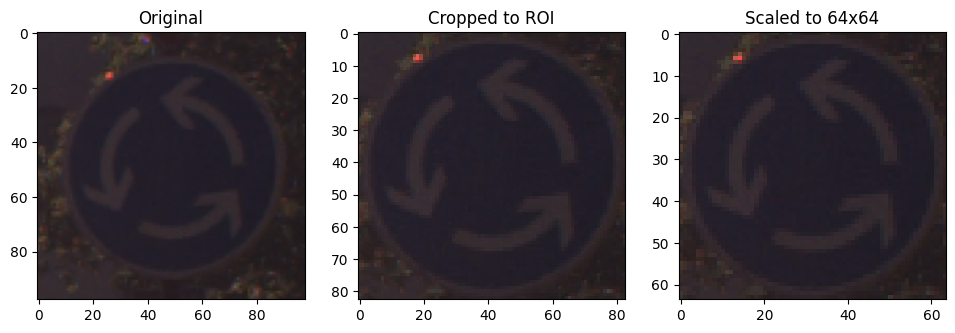

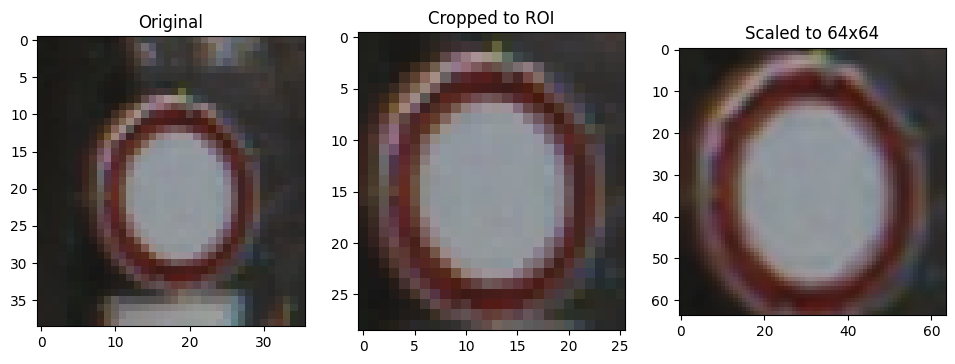

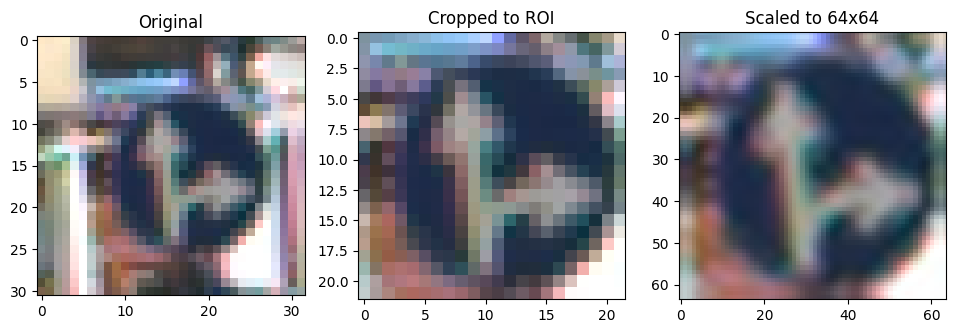

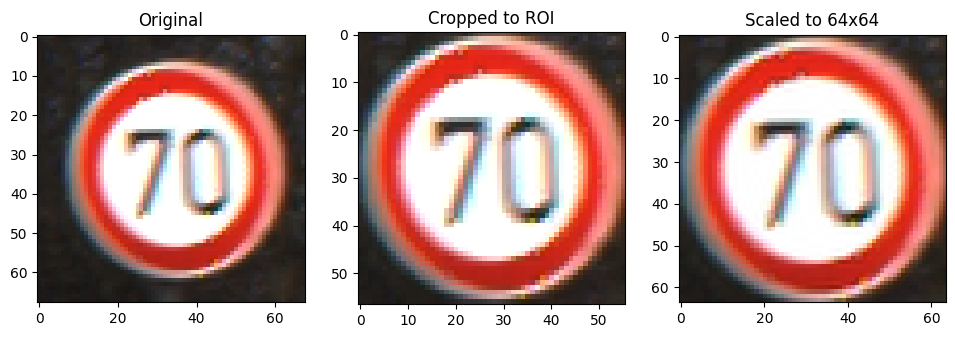

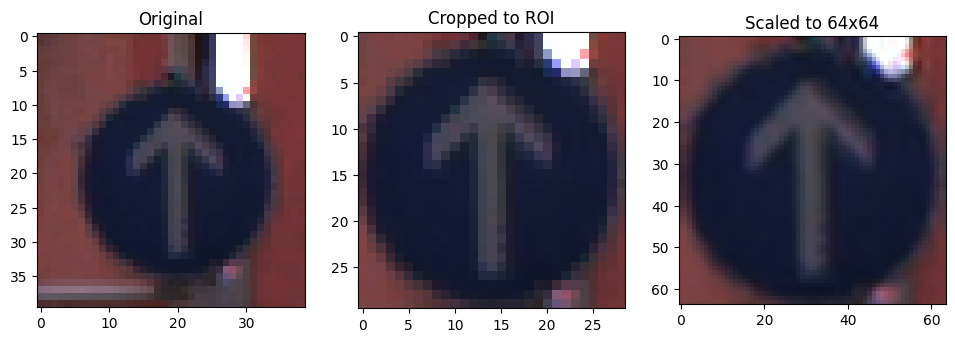

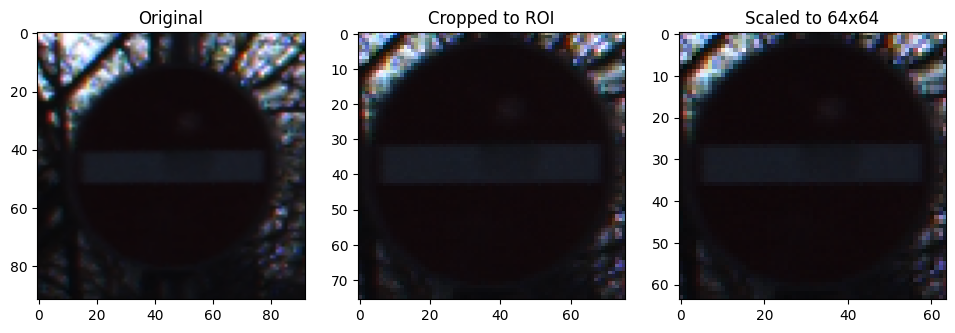

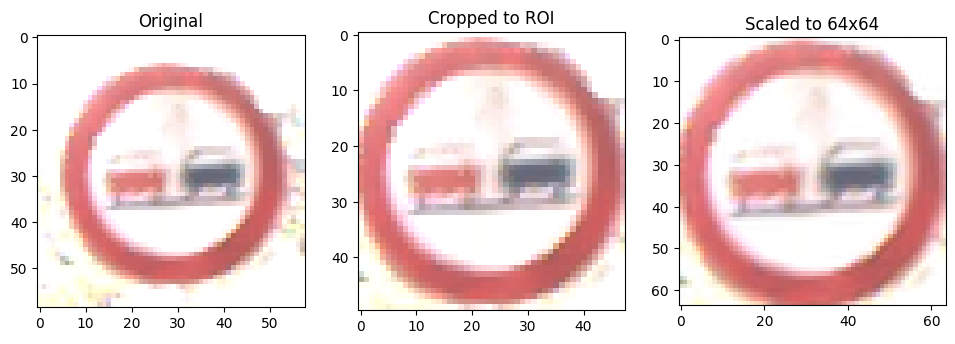

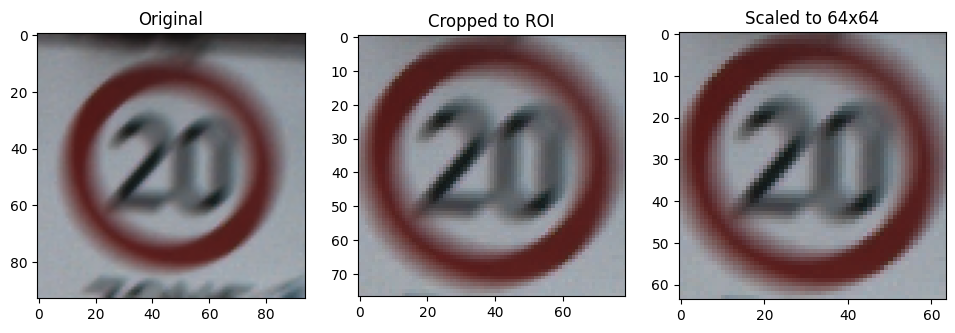

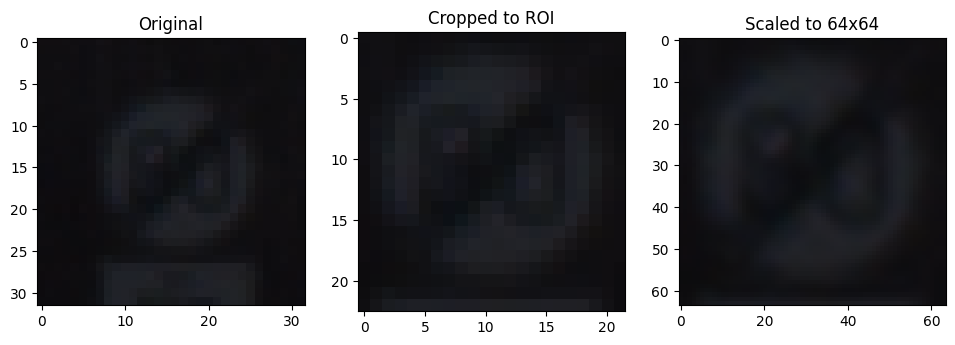

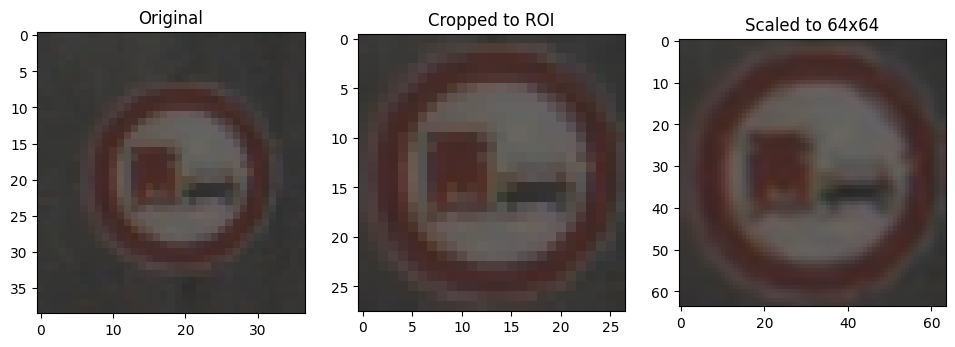

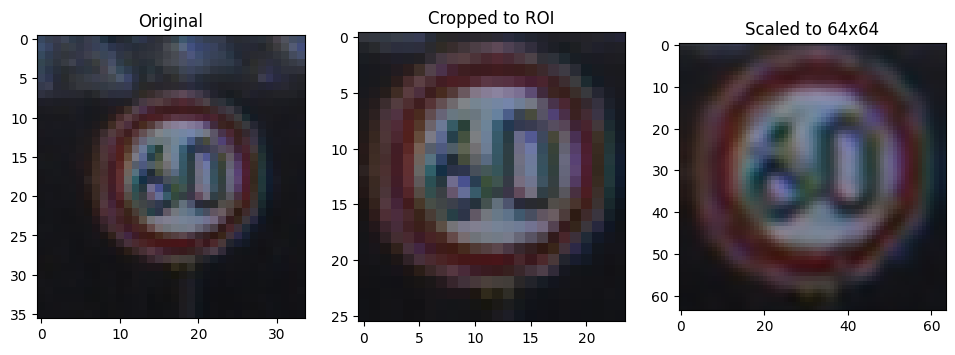

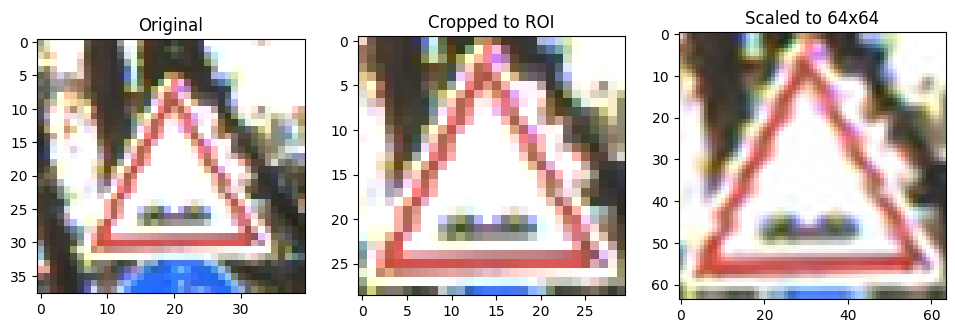

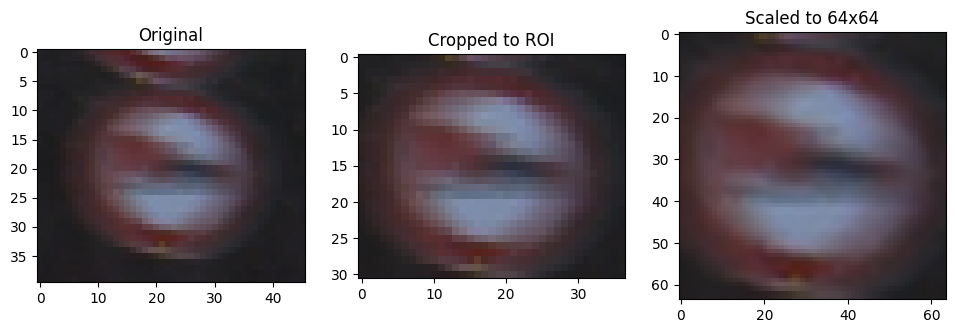

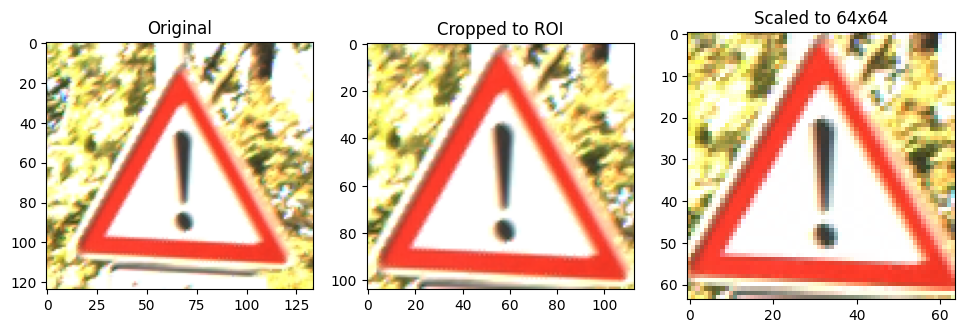

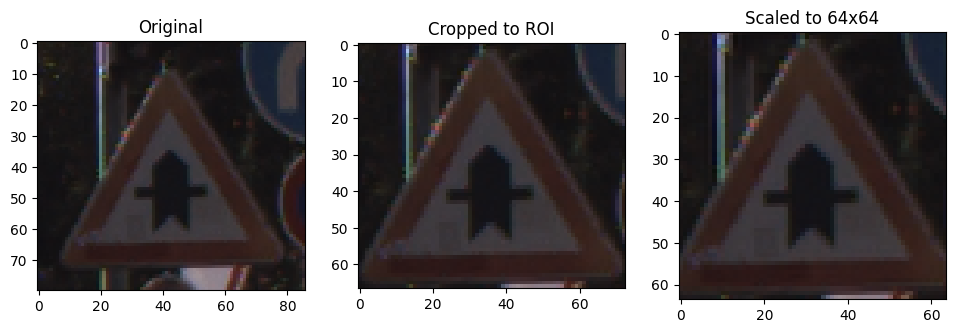

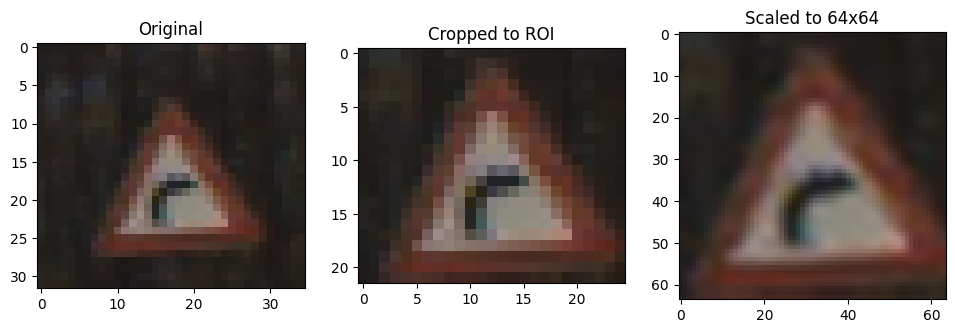

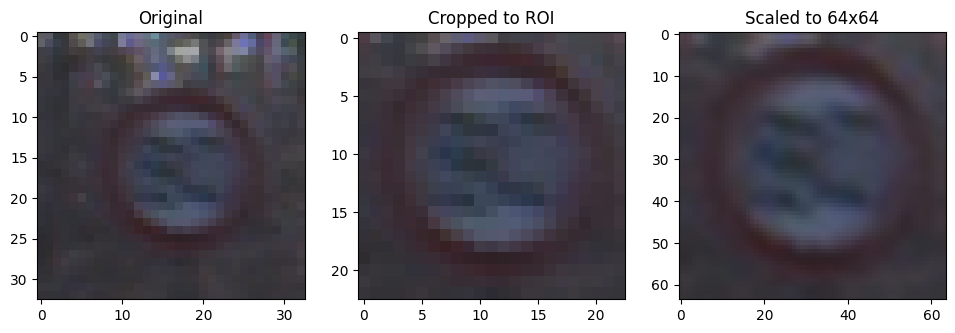

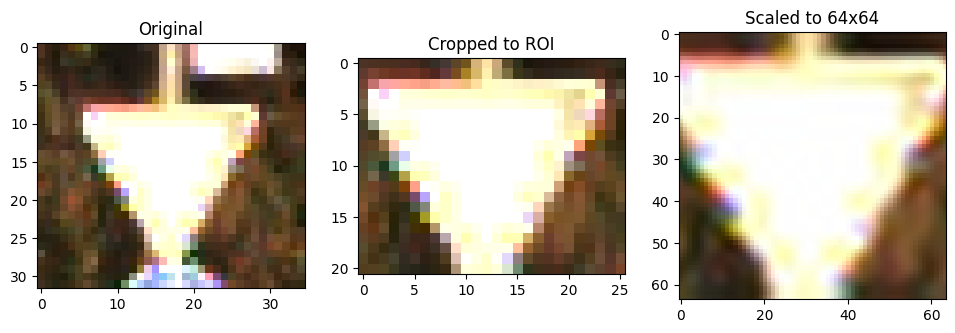

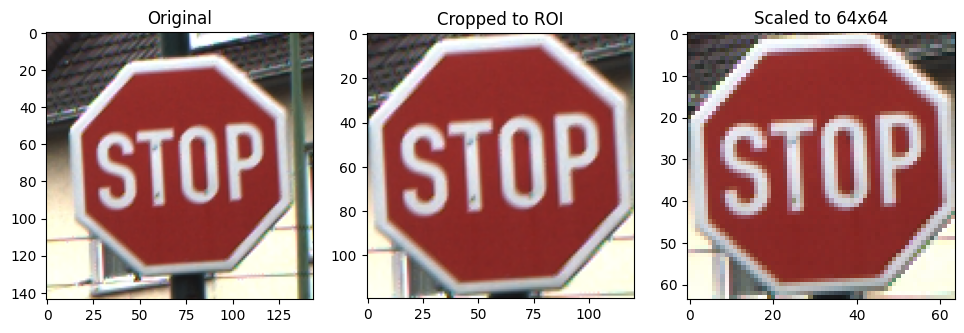

In [3]:
samples = dft.sample(100, with_replacement=False)

# iteration this way is not efficient, but it's a small dataset and we want to display it only
# no harm done
for r in samples.iter_rows(named=True):
    image = restore_image_from_list(r["Width"], r["Height"], r["Image"])
    image = (image * 255.0).astype(np.uint8)
    cropped_image = restore_image_from_list(
        r["Cropped_Width"], r["Cropped_Height"], r["Cropped_Image"]
    )
    cropped_image = (cropped_image * 255.0).astype(np.uint8)
    scaled_image = restore_image_from_list(
        r["Scaled_Width"], r["Scaled_Height"], r["Scaled_Image"]
    )
    scaled_image = (scaled_image * 255.0).astype(np.uint8)
    # equalized_image = restore_image_from_list(
    #     r["Scaled_Width"], r["Scaled_Height"], r["Stretched_Histogram_Image"]
    # )
    # equalized_image = (equalized_image * 255.0).astype(np.uint8)
    # hsv_equalized_image = restore_image_from_list(
    #    r["Scaled_Width"], r["Scaled_Height"], r["Stretched_LAB_Histogram_Image"]
    # )
    # hsv_equalized_image = (hsv_equalized_image * 255.0).astype(np.uint8)

    n_row = 1
    n_col = 5
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(n_row, n_col, 1)
    ax.imshow(image)
    ax.set_title("Original", size=12)
    ax = fig.add_subplot(n_row, n_col, 2)
    ax.imshow(cropped_image)
    ax.set_title("Cropped to ROI", size=12)
    ax = fig.add_subplot(n_row, n_col, 3)
    ax.imshow(scaled_image)
    ax.set_title("Scaled to 64x64", size=12)
    # ax = fig.add_subplot(n_row, n_col, 4)
    # ax.imshow(equalized_image)
    # ax.set_title("Stretch Histogram", size=12)
    # ax = fig.add_subplot(n_row, n_col, 5)
    # ax.imshow(hsv_equalized_image)
    # ax.set_title("Stretch Histogram HSV", size=12)